<a href="https://colab.research.google.com/github/freya9711/ARIMA-dissertation/blob/main/CatnwellF_170691367_LSTM_Model_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LSTM**

Implementing the library

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.2 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=0c62367f4c3bae8eef2e10399ebcaa0d95531cf7204ce81eaab7bc044f28b8ef
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

Loading the data 

In [ ]:
ndata=yf.download('^OEX',start='2017-01-01', interval='1wk',  end='2019-12-31') [['Adj Close']]
ndata.head()


[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2017-01-01,1008.150024
2017-01-08,1006.590027
2017-01-15,1003.039978
2017-01-22,1012.929993
2017-01-29,1013.690002


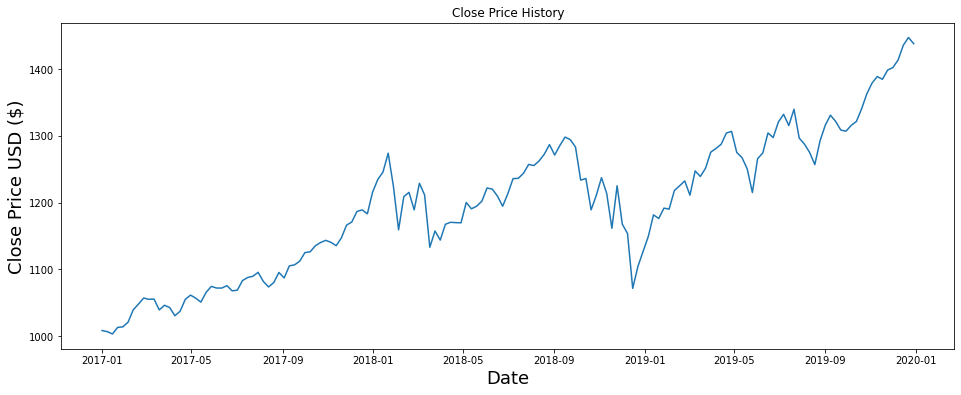

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(ndata['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
ndata.reset_index(inplace=True)

In [ ]:
ndata.head()

,Date,Adj Close
0,2017-01-01,1008.150024
1,2017-01-08,1006.590027
2,2017-01-15,1003.039978
3,2017-01-22,1012.929993
4,2017-01-29,1013.690002


Preparing the data

In [ ]:
cl = ndata.filter(['Adj Close'])
al = cl.values
train = int(np.ceil( len(al) * .50 ))

#Scaling the data
scl = MinMaxScaler(feature_range=(0,1))
l_data =scl.fit_transform(cl)

def processData(ndata,lb):
    X,Y = [],[]
    for i in range(len(ndata)-lb-1):
        X.append(ndata[i:(i+lb),0])
        Y.append(ndata[(i+lb),0])
    return np.array(X),np.array(Y)
 
lb=10
X,y = processData(l_data,lb)
X_train,X_test = X[:int(X.shape[0]*0.54)],X[int(X.shape[0]*0.47):]
y_train,y_test = y[:int(y.shape[0]*0.54)],y[int(y.shape[0]*0.47):]
print(X_train.shape[0],X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])
print(y_train.shape[0])
print(y_test.shape[0])

78 10
78 10
78
78


**Building the model**

In [ ]:
model = Sequential()
model.add(LSTM(256,input_shape=(lb,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
 
#Reshaping data
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
 
#Fit model to check for overfitting
history = model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),shuffle=False)
 
model.summary() 

Epoch 1/100
3/3 [==============================] - 3s 254ms/step - loss: 0.0943 - val_loss: 0.1050
Epoch 2/100
3/3 [==============================] - 0s 47ms/step - loss: 0.0103 - val_loss: 0.0179
Epoch 3/100
3/3 [==============================] - 0s 47ms/step - loss: 0.0244 - val_loss: 0.0317
Epoch 4/100
3/3 [==============================] - 0s 47ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 5/100
3/3 [==============================] - 0s 44ms/step - loss: 0.0065 - val_loss: 0.0260
Epoch 6/100
3/3 [==============================] - 0s 45ms/step - loss: 0.0090 - val_loss: 0.0258
Epoch 7/100
3/3 [==============================] - 0s 43ms/step - loss: 0.0064 - val_loss: 0.0143
Epoch 8/100
3/3 [==============================] - 0s 46ms/step - loss: 0.0033 - val_loss: 0.0091
Epoch 9/100
3/3 [==============================] - 0s 47ms/step - loss: 0.0049 - val_loss: 0.0121
Epoch 10/100
3/3 [==============================] - 0s 45ms/step - loss: 0.0067 - val_loss: 0.0104
Epoch 11/100
3/3 [

Ploting the Training dataset for the model 

Text(0, 0.5, 'S&P stock price')

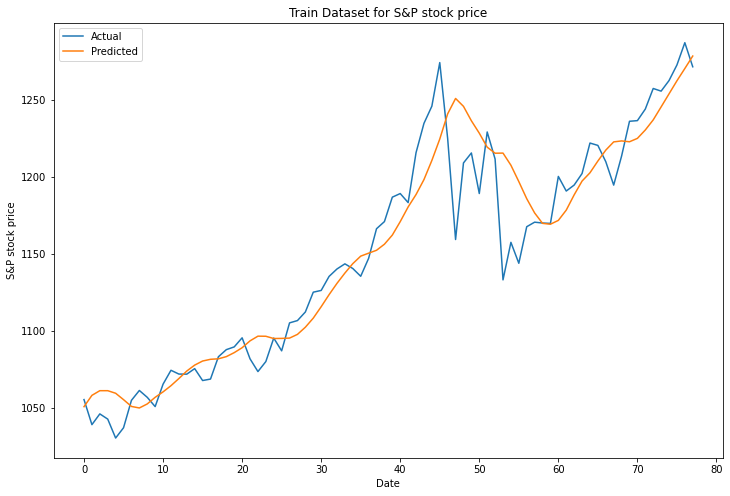

In [ ]:
plt.figure(figsize=(12,8))
Xt = model.predict(X_train)
plt.plot(scl.inverse_transform(y_train.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Train Dataset for S&P stock price")
plt.xlabel("Date")
plt.ylabel("S&P stock price")

**Predictions**

Ploting the test dataset for the model 

Text(0, 0.5, 'Adjusted close stock price')

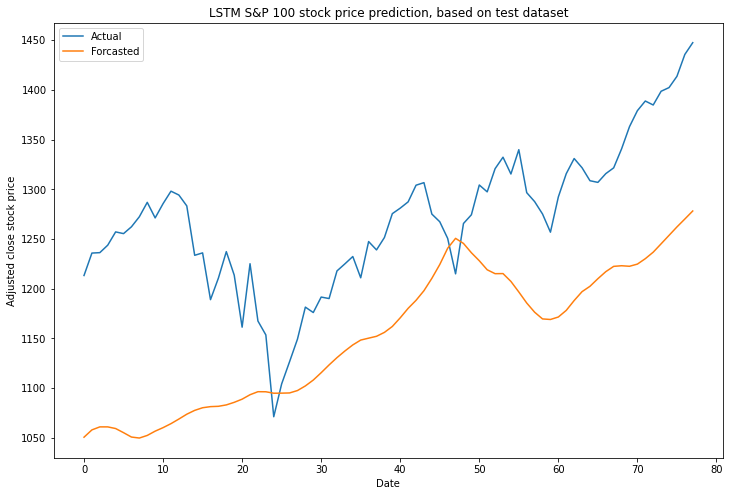

In [ ]:
plt.figure(figsize=(12,8))
predicted = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Forcasted")
plt.legend()
plt.title("LSTM S&P 100 stock price prediction, based on test dataset")
plt.xlabel("Date")
plt.ylabel("Adjusted close stock price")

In [ ]:
predictions = scl.inverse_transform(predicted)

In [ ]:
len(predictions)

78

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


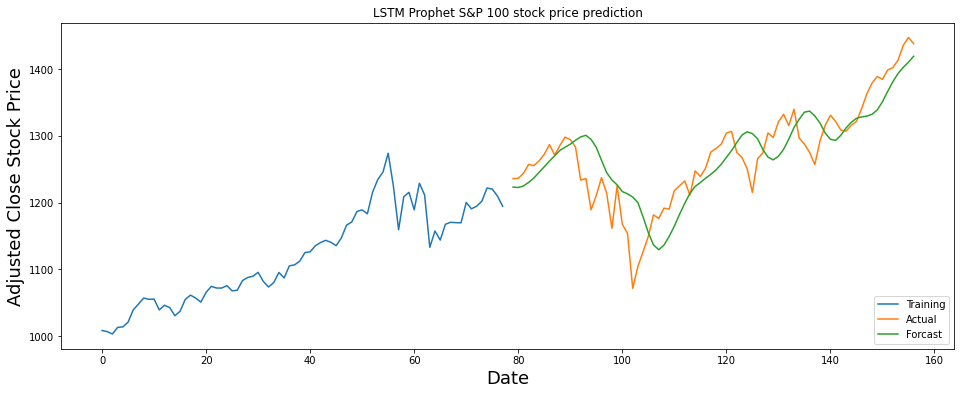

In [ ]:
# Plot the data
train = cl[:78]
valid = cl[79:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Prophet S&P 100 stock price prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adjusted Close Stock Price', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Training', 'Actual', 'Forcast'], loc='lower right')
plt.show()

In [ ]:
import plotly.graph_objs as go

In [ ]:
rmse = np.sqrt(np.mean(((predicted - y_test) ** 2)))
rmse

0.21675685177383816

Accuracy metrics for test model

In [ ]:
y_pred = valid['Predictions']
y_test = valid['Adj Close']
print(y_test.shape, y_pred.shape)

# # Mean Absolute Error (MAE)
MAE = np.mean(abs(y_pred - y_test))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE, 2)))

# Median Absolute Error (MedAE)
MEDAE = np.median(abs(y_pred - y_test))
print('Median Absolute Error (MedAE): ' + str(np.round(MEDAE, 2)))

# Mean Squared Error (MSE)
MSE = np.square(np.subtract(y_pred, y_test)).mean()
print('Mean Squared Error (MSE): ' + str(np.round(MSE, 2)))

# Root Mean Squarred Error (RMSE) 
RMSE = np.sqrt(np.mean(np.square(y_pred - y_test)))
print('Root Mean Squared Error (RMSE): ' + str(np.round(RMSE, 2)))

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test, y_pred)/ y_test))) * 100
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE, 2)) + ' %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test, y_pred)/ y_test))) * 100
print('Median Absolute Percentage Error (MDAPE): ' + str(np.round(MDAPE, 2)) + ' %')

(78,) (78,)
Mean Absolute Error (MAE): 34.36
Median Absolute Error (MedAE): 30.54
Mean Squared Error (MSE): 1816.96
Root Mean Squared Error (RMSE): 42.63
Mean Absolute Percentage Error (MAPE): 2.76 %
Median Absolute Percentage Error (MDAPE): 2.31 %
